In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split

df = pd.read_csv("diamonds.csv", index_col=0)
df

C:\Users\Robotux\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
df['cut'] = pd.Categorical(df.cut)
df['color'] = pd.Categorical(df.color)
df['clarity'] = pd.Categorical(df.clarity)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [17]:
X = df.loc[:, ~df.columns.isin( ['price', 'cut', 'color', 'clarity'] ) ]
Y = df['price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15)
X_train[:5]

,carat,depth,table,x,y,z
52859,0.72,62.7,56.0,5.72,5.76,3.60
16414,1.52,60.7,61.0,7.47,7.36,4.50
46702,0.55,61.3,57.0,5.28,5.25,3.23
13596,1.04,61.2,59.0,6.57,6.51,4.00
43462,0.51,63.2,58.0,5.07,5.05,3.20


In [45]:

clf_xgb = xgb.XGBRegressor(n_estimators=10)

In [46]:
clf_xgb.fit(X_train, y_train)

C:\Users\Robotux\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=24,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [47]:
y_pred = clf_xgb.predict(X_test)
print ('MAPE', mean_absolute_percentage_error(y_test, y_pred) )

print ('MAE', mean_absolute_error(y_test, y_pred) )

MAPE 0.19037468863650603
MAE 765.7046164292339


In [48]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Non-negative regression

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

housing = fetch_california_housing()

In [50]:
X = housing.data
Y = housing.target

In [52]:
X[:5]

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15)

In [54]:
reg = LinearRegression().fit(X_train, y_train)

In [55]:
y_pred = reg.predict(X_test)

In [56]:
y_pred[ y_pred < 0 ]

array([-0.12796951, -0.6654215 , -0.793413  , -0.41463142, -0.13984405,
       -0.03409866, -0.66340798, -0.43601276])

In [57]:
reg.coef_

array([ 4.35439226e-01,  9.75687411e-03, -1.03453399e-01,  6.13990113e-01,
       -3.96916963e-06, -3.40162111e-03, -4.18074823e-01, -4.27611791e-01])

In [65]:
reg.score(X_test, y_test)

0.5945787000665598

In [58]:
reg_nnls = LinearRegression(positive=True).fit(X_train, y_train)

In [61]:
y_pred_nnls = reg_nnls.predict(X_test)

In [62]:
y_pred_nnls[ y_pred_nnls < 0 ]

array([], dtype=float64)

In [64]:
reg_nnls.coef_

array([4.33683810e-01, 1.87463259e-02, 0.00000000e+00, 3.23601926e-02,
       3.25969065e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [66]:
reg_nnls.score(X_test, y_test)

0.4900346705740164

In [67]:
y_test.shape

(4128,)

### ReLU

In [73]:
y_pred = reg.predict(X_test)
print (y_pred.shape)
# print (y_pred[ y_pred == 0 ] )
y_pred = np.maximum(y_pred, 0)
print (y_pred[ y_pred < 0 ] )
# print (y_pred[ y_pred == 0 ] )
print (y_pred.shape)

(4128,)
[]
[]
[0. 0. 0. 0. 0. 0. 0. 0.]
(4128,)


In [74]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.596195215392402

(array([  36.,  841., 1628., 1984., 1878., 2221., 2153., 1618., 1591.,
        1208., 1075.,  694.,  567.,  672.,  435.,  317.,  244.,  235.,
         144., 1099.]),
 array([0.14999 , 0.392491, 0.634992, 0.877493, 1.119994, 1.362495,
        1.604996, 1.847497, 2.089998, 2.332499, 2.575   , 2.817501,
        3.060002, 3.302503, 3.545004, 3.787505, 4.030006, 4.272507,
        4.515008, 4.757509, 5.00001 ]),
 <BarContainer object of 20 artists>)

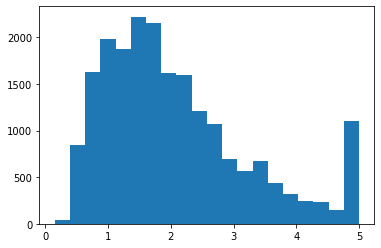

In [76]:
plt.hist(Y, bins=20)

In [93]:
clf_xgb = xgb.XGBRegressor( objective='count:poisson', n_estimators=150 )
clf_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0.699999988, max_depth=6, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150,
             n_jobs=24, num_parallel_tree=1, objective='count:poisson',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=None, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [94]:
y_pred_xgb = clf_xgb.predict(X_test)
y_pred_xgb[ y_pred_xgb < 0 ]

array([], dtype=float32)

In [95]:
clf_xgb.score(X_test, y_test)

0.8300191385556853